In [0]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
dataset = pd.DataFrame(boston.data)
#Adding the feature names to the dataframe
dataset.columns = boston.feature_names
#Adding target variable to dataframe
dataset['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Descriptive Statistics

In [31]:
dataset.shape

(506, 14)

In [0]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [0]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
dataset.corr(method='pearson').sort_values(by='PRICE',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
PRICE,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

### Data Visualizations

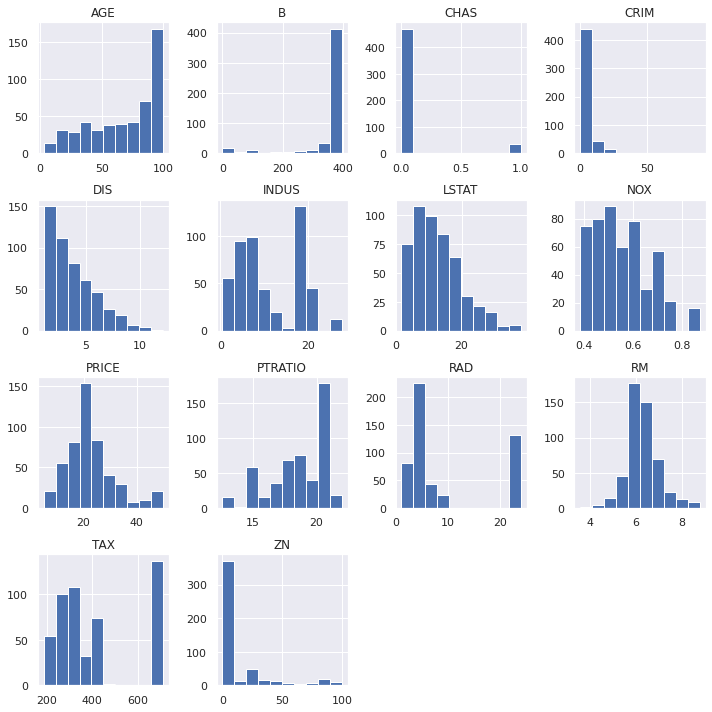

In [0]:
dataset.hist(sharex=False,figsize=(10,10))
plt.tight_layout()

In [0]:
for name in dataset.columns:
  print(dataset[name].value_counts())

In [0]:
#dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(10,10))
#plt.tight_layout()

In [0]:
#dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False,
#fontsize=8,figsize=(10,10))
#plt.tight_layout()

In [0]:
#pd.plotting.scatter_matrix(dataset, alpha=1, figsize=(10, 10))
#plt.tight_layout()

In [0]:
#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot = True,cmap="YlGnBu",ax=ax)

In [0]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Evaluate Algorithms: Baseline

In [0]:
# Split-out validation dataset

X = dataset.drop('PRICE',axis=1) # 3 columns
Y = dataset['PRICE'] # last columns
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,stratify=X['CHAS'],
test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric
# MSE will give a gross idea of how wrong all predictions are (0 is perfect).
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [0]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))  # need standardization
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR())) # need standardization

In [40]:
# evaluate each model in turn
results = []
names = []
cv_results_mean=[]
cv_results_std=[]
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

  results.append(cv_results)
  names.append(name)
  cv_results_mean.append(cv_results.mean())
  cv_results_std.append(cv_results.std())

  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -25.069480 (8.833571)
LASSO: -29.431195 (8.945404)
EN: -28.140745 (8.736669)
KNN: -41.362335 (14.073883)
CART: -21.636397 (9.756366)
SVR: -67.925626 (18.375282)


In [41]:
df_results=pd.DataFrame(list(zip(names,cv_results_mean,cv_results_std)),
                  columns=['Names','CV_mean','CV_std'])
df_results.sort_values(by='CV_mean',ascending=False)

,Names,CV_mean,CV_std
4,CART,-21.636397,9.756366
0,LR,-25.069480,8.833571
2,EN,-28.140745,8.736669
1,LASSO,-29.431195,8.945404
3,KNN,-41.362335,14.073883
5,SVR,-67.925626,18.375282


In [0]:
# Compare Algorithms
fig,ax = plt.subplots()
plt.title('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The differing scales of the data is probably hurting the skill of all of the algorithms and
perhaps more so for SVR and KNN. In the next section we will look at running the same
algorithms using a standardized copy of the data.

### Evaluate Algorithms: Standardizati

In [0]:
from sklearn.linear_model import TheilSenRegressor, HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)

In [74]:
# Standardize the dataset
pipelines = []

pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge',Ridge())])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

# New , Theil, Huber Regressor
pipelines.append(('RANSAC', Pipeline([('Scaler', StandardScaler()),('RANSAC', ransac)])))
pipelines.append(('TheilSen', Pipeline([('Scaler', StandardScaler()),('RANSAC', TheilSenRegressor())])))
pipelines.append(('Huber', Pipeline([('Scaler', StandardScaler()),('RANSAC', HuberRegressor())])))
#New: Poly nominal
pipelines.append(('Poly2', Pipeline([('Scaler', StandardScaler()),
                                     ('Poly2', PolynomialFeatures(degree=2)),
                                     ('linear', LinearRegression(fit_intercept=False))])))
#pipelines.append(('Poly3', Pipeline([('Scaler', StandardScaler()),
                                    # ('Poly3', PolynomialFeatures(degree=3)),
                                     #('linear', LinearRegression(fit_intercept=False))])))


results = []
names = []
cv_results_mean=[]
cv_results_std=[]
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

  results.append(cv_results)
  names.append(name)
  cv_results_mean.append(cv_results.mean())
  cv_results_std.append(cv_results.std())

  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -25.069480 (8.833571)
LASSO: -30.703985 (9.884565)
Ridge: -25.057200 (8.853171)
EN: -32.516578 (11.181008)
KNN: -22.284717 (11.172533)
CART: -20.898855 (8.530803)
SVR: -30.772367 (11.586627)
RANSAC: -27.785613 (12.921527)
TheilSen: -38.992638 (17.837220)
Huber: -27.295167 (12.637814)
Poly2: -15.414760 (3.982184)


In [75]:
df_results=pd.DataFrame(list(zip(names,cv_results_mean,cv_results_std)),
                  columns=['Names','CV_mean','CV_std'])
df_results.sort_values(by='CV_mean',ascending=False)

,Names,CV_mean,CV_std
10,Poly2,-15.414760,3.982184
5,CART,-20.898855,8.530803
4,KNN,-22.284717,11.172533
2,Ridge,-25.057200,8.853171
0,LR,-25.069480,8.833571
9,Huber,-27.295167,12.637814
7,RANSAC,-27.785613,12.921527
1,LASSO,-30.703985,9.884565
6,SVR,-30.772367,11.586627
3,EN,-32.516578,11.181008


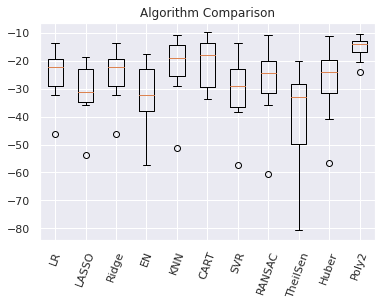

In [76]:
# Compare Algorithms
fig,ax = plt.subplots()
plt.title('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names,rotation=70)
plt.show()

### Improve Results With Tuning

In [78]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [79]:
#@title Default title text
grid_result.cv_results_

{'mean_fit_time': array([0.00122659, 0.00108292, 0.00110488, 0.00112145, 0.00102427,
        0.00112638, 0.00106492, 0.0011271 , 0.00094609, 0.00106976,
        0.00098486]),
 'mean_score_time': array([0.001249  , 0.00126512, 0.00128622, 0.00132163, 0.00130847,
        0.00139563, 0.00141389, 0.00148835, 0.00126579, 0.00143363,
        0.00133417]),
 'mean_test_score': array([-20.63247195, -19.71853537, -22.72015283, -24.6858609 ,
        -25.07265781, -24.51627881, -25.21622227, -25.64536991,
        -25.94998538, -26.51189681, -27.16399775]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15},
  {'n_nei

In [0]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])}

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


### Ensemble Methods
 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).

 Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [0]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))

ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))

ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))

ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))

In [0]:
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -15.728363 (8.202503)
ScaledGBM: -11.181618 (8.611963)
ScaledRF: -13.040078 (10.139112)
ScaledET: -9.201682 (6.767840)


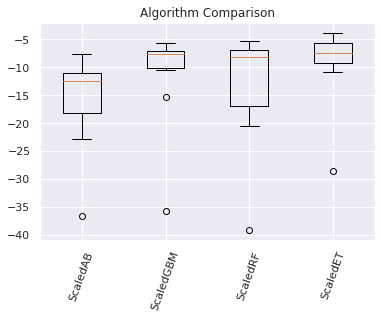

In [0]:
# Compare Algorithms
fig,ax = plt.subplots()
plt.title('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names,rotation=70)
plt.show()

### Tune Ensemble Methods

#### Grid Search CV

In [0]:
# Tune scaled GBM
# The default number of boosting stages to perform (n estimators) is 100.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))

model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
#Grid Search CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


In [0]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


#### Random search CV

In [0]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers. 
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [0]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_validation)
    errors = abs(predictions - Y_validation)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_validation, Y_validation)

Model Performance
Average Error: 2.5152 degrees.
Accuracy = 87.72%.


In [0]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_validation, Y_validation)

Model Performance
Average Error: 2.0706 degrees.
Accuracy = 89.75%.


In [0]:
print('Improvement of {:0.2f}%.'.\
      format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.31%.


In [0]:
predictions = best_random.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

10.474836350490248


### Grid Search with Cross Validation after Random Search

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.2min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [0]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_validation, Y_validation)

Model Performance
Average Error: 2.0321 degrees.
Accuracy = 89.94%.


In [0]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.53%.


In [0]:
predictions = best_grid.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

10.013167895833329


20.12 Summary

In this chapter you worked through a regression predictive modeling machine learning problem
from end-to-end using Python. Specifically, the steps covered were:

 Problem Definition (Boston house price data).

 Loading the Dataset.

 Analyze Data (some skewed distributions and correlated attributes).

 Evaluate Algorithms (Linear Regression looked good).

 Evaluate Algorithms with Standardization (KNN looked good).

 Algorithm Tuning (K=3 for KNN was best).

 Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good).

 Tuning Ensemble Methods (getting the most from Gradient Boosting).

 Finalize Model (use all training data and confirm using validation dataset).